In [32]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import datetime
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']  
mpl.rcParams['axes.unicode_minus'] = False

In [33]:
df = pd.read_csv('100mountain.csv',encoding='utf-8')
df

c:\program files\python39\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (9,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,shopNumber,posNumber,transactionDate_NEW,transactionHour,serial,itemLine,memberID,member,invoice,productID,productName,brand,brandName,number,subtotal
0,1,1,2020/1/1,13:11:23,1,1,11803842,戴鴻銘,YN51877250,11110705,瓦斯 ARC-9121 高山瓦斯 野樂,20,Camping Ace,2,170
1,1,1,2020/1/1,13:11:29,1,2,11803842,戴鴻銘,YN51877250,11771500,12粒蛋盒 #511A Coghlans,27,Coghlan\s,1,144
2,1,1,2020/1/1,13:17:19,2,1,11802272,王建平,YN51877251,102001751,童保暖內衣 10459-30499 ODLO 桃紅/灰麻花 128,130,ODLO,1,1041
3,1,1,2020/1/1,13:18:00,2,2,11802272,王建平,YN51877251,11172406,耳罩 AR-22 雪之旅 3M,174,Snow Travel,1,10
4,1,1,2020/1/1,13:18:51,3,1,11802272,王建平,YN51877252,102001751,童保暖內衣 10459-30499 ODLO 桃紅/灰麻花 128,130,ODLO,1,1170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198394,3,3,2020/12/31,21:23:32,58,1,51700154,陳?杰,HM51892816,602000036,行動電源戶外照明燈 N900LG 1800流明-三色溫璀燦金 N9-LUMENA+,309,N9,1,3680
198395,3,3,2020/12/31,21:23:33,58,2,51700154,陳?杰,HM51892816,8440006,HK500 燈芯單入 Helox-500 Petromax,147,Petromax,3,240
198396,3,3,2020/12/31,21:24:30,59,1,31700597,吳章暢,HM51892817,941303,二代10吋不繡鋼荷蘭鍋 SOTO ST-910,216,日本 SOTO,1,8550
198397,3,3,2020/12/31,21:27:32,60,1,31700597,吳章暢,HM51892815,941303,二代10吋不繡鋼荷蘭鍋 SOTO ST-910,216,日本 SOTO,-1,-8550


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198399 entries, 0 to 198398
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   shopNumber           198399 non-null  int64 
 1   posNumber            198399 non-null  int64 
 2   transactionDate_NEW  198399 non-null  object
 3   transactionHour      198399 non-null  object
 4   serial               198399 non-null  int64 
 5   itemLine             198399 non-null  int64 
 6   memberID             185592 non-null  object
 7   member               185531 non-null  object
 8   invoice              188795 non-null  object
 9   productID            198399 non-null  object
 10  productName          198398 non-null  object
 11  brand                196032 non-null  object
 12  brandName            198399 non-null  object
 13  number               198399 non-null  int64 
 14  subtotal             198399 non-null  int64 
dtypes: int64(6), object(9)
memory usag

In [35]:
df['transactionDate_NEW'] = df['transactionDate_NEW'].astype('datetime64')

In [36]:
df

,shopNumber,posNumber,transactionDate_NEW,transactionHour,serial,itemLine,memberID,member,invoice,productID,productName,brand,brandName,number,subtotal
0,1,1,2020-01-01,13:11:23,1,1,11803842,戴鴻銘,YN51877250,11110705,瓦斯 ARC-9121 高山瓦斯 野樂,20,Camping Ace,2,170
1,1,1,2020-01-01,13:11:29,1,2,11803842,戴鴻銘,YN51877250,11771500,12粒蛋盒 #511A Coghlans,27,Coghlan\s,1,144
2,1,1,2020-01-01,13:17:19,2,1,11802272,王建平,YN51877251,102001751,童保暖內衣 10459-30499 ODLO 桃紅/灰麻花 128,130,ODLO,1,1041
3,1,1,2020-01-01,13:18:00,2,2,11802272,王建平,YN51877251,11172406,耳罩 AR-22 雪之旅 3M,174,Snow Travel,1,10
4,1,1,2020-01-01,13:18:51,3,1,11802272,王建平,YN51877252,102001751,童保暖內衣 10459-30499 ODLO 桃紅/灰麻花 128,130,ODLO,1,1170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198394,3,3,2020-12-31,21:23:32,58,1,51700154,陳?杰,HM51892816,602000036,行動電源戶外照明燈 N900LG 1800流明-三色溫璀燦金 N9-LUMENA+,309,N9,1,3680
198395,3,3,2020-12-31,21:23:33,58,2,51700154,陳?杰,HM51892816,8440006,HK500 燈芯單入 Helox-500 Petromax,147,Petromax,3,240
198396,3,3,2020-12-31,21:24:30,59,1,31700597,吳章暢,HM51892817,941303,二代10吋不繡鋼荷蘭鍋 SOTO ST-910,216,日本 SOTO,1,8550
198397,3,3,2020-12-31,21:27:32,60,1,31700597,吳章暢,HM51892815,941303,二代10吋不繡鋼荷蘭鍋 SOTO ST-910,216,日本 SOTO,-1,-8550


---

In [37]:
# 資料清洗 去除不需要的值

df = df[~(df['brand'] == '999')]
df
df = df[~(df['brandName'] == '其他品牌')]
df = df[~(df['brandName'] == '出清品')]

In [38]:
df['number'] = df['number'].astype('int64')

In [8]:
# df = df[~ (df[' number'] == -1)]
# df

In [39]:
# 統計 各品牌銷售量
brandgroup = df.groupby(['brandName']).sum().sort_values('subtotal',ascending=False)
brandgroup

,shopNumber,posNumber,serial,itemLine,number,subtotal
brandName,,,,,,
Snow Peak,20459,22466,452756,27666,12783,22704634
Fjallraven,14542,12181,221334,16855,7008,18527344
Hilleberg,2673,3147,29331,2566,1349,14963145
MAMMUT,7649,5726,193605,8620,3378,14517097
100mountain,45096,37413,852956,64683,68688,14260457
...,...,...,...,...,...,...
Equinox 防水袋,39,39,166,14,13,0
CANARI,1,2,12,1,1,0
FoorDisc,5,6,262,6,5,0


In [31]:
brandgroup.iloc[0:10,-2:]

,number,subtotal
brandName,,
Snow Peak,12783,22704634
Fjallraven,7008,18527344
Hilleberg,1349,14963145
MAMMUT,3378,14517097
100mountain,68688,14260457
mont-bell,6057,13273142
Zamberlan,2041,11727168
MysteryRanch,2515,11591406
始祖鳥 Arcteryx,2008,9002190


In [40]:
# 前十品牌 月銷量計算
top10List = list(brandgroup.index[0:10])
print(top10List)
top10 = df[['transactionDate_NEW','brandName','subtotal']]
top10 = top10[top10['brandName'].isin(top10List)]
top10['month'] = top10['transactionDate_NEW'].dt.strftime('%Y-%m-%d').astype('datetime64[ns]')
top10

['Snow Peak', 'Fjallraven', 'Hilleberg', 'MAMMUT', '100mountain', 'mont-bell', 'Zamberlan', 'MysteryRanch', '始祖鳥 Arcteryx', 'Komperdell']


,transactionDate_NEW,brandName,subtotal,month
17,2020-01-01,Snow Peak,2250,2020-01-01
18,2020-01-01,Snow Peak,1150,2020-01-01
19,2020-01-01,Snow Peak,300,2020-01-01
36,2020-01-01,Komperdell,1575,2020-01-01
38,2020-01-01,100mountain,357,2020-01-01
...,...,...,...,...
198353,2020-12-31,100mountain,199,2020-12-31
198357,2020-12-31,100mountain,600,2020-12-31
198371,2020-12-31,Zamberlan,8900,2020-12-31
198374,2020-12-31,100mountain,0,2020-12-31


In [16]:
newdf = pd.DataFrame(index=pd.date_range(start="2020-01-01",end="2020-12-31"))


            subtotal
month               
2020-01-01     40185
2020-01-02     47640
2020-01-03     32784
2020-01-04     18878
2020-01-05     17874
...              ...
2020-12-27    135099
2020-12-28     53582
2020-12-29     82110
2020-12-30     61578
2020-12-31     46761

[366 rows x 1 columns]
            subtotal
month               
2020-01-01     48893
2020-01-02     19017
2020-01-03     27280
2020-01-04     54679
2020-01-05     37662
...              ...
2020-12-27     82404
2020-12-28     76679
2020-12-29     59021
2020-12-30     99432
2020-12-31     56172

[366 rows x 1 columns]
            subtotal
month               
2020-01-03     11898
2020-01-05     55794
2020-01-07      7050
2020-01-10     50000
2020-01-12     20400
...              ...
2020-12-23     65000
2020-12-24     13900
2020-12-26    111200
2020-12-29     35200
2020-12-30     24569

[307 rows x 1 columns]
            subtotal
month               
2020-01-01     88365
2020-01-02     15410
2020-01-03     16520
2020

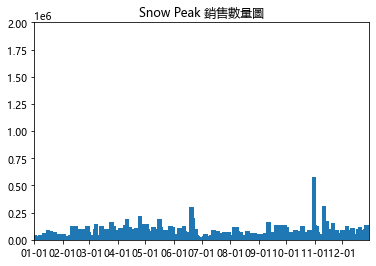

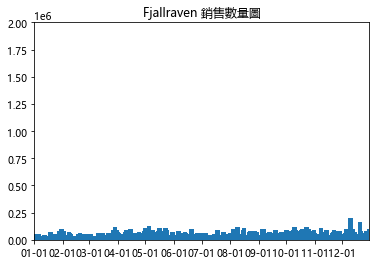

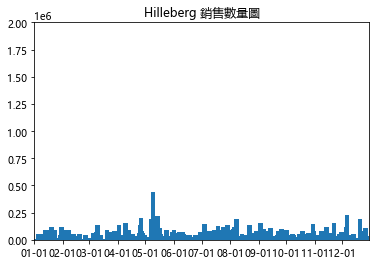

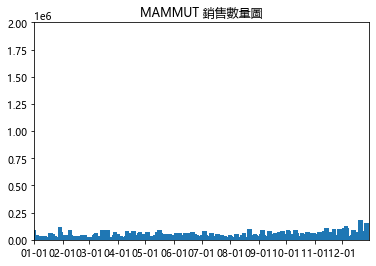

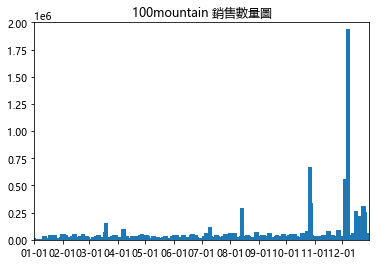

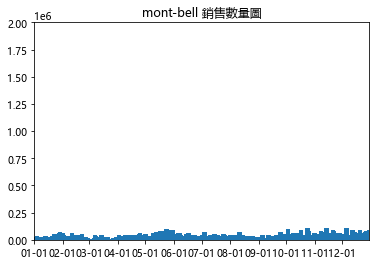

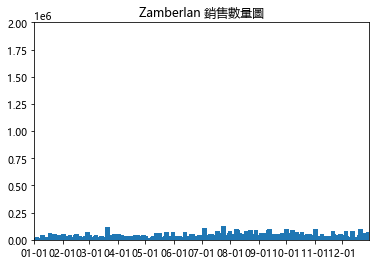

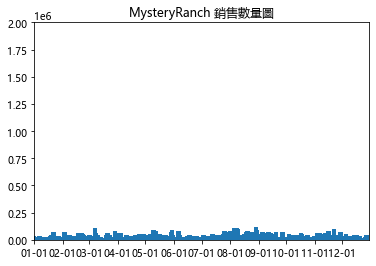

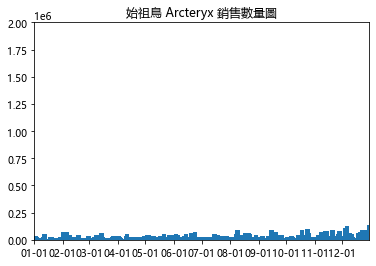

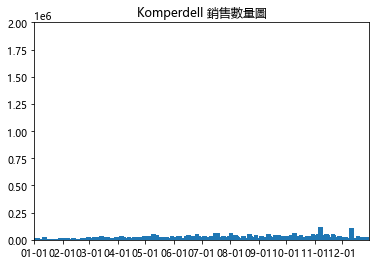

In [17]:
for i in range(len(top10List)):
    top10branddata = top10[top10['brandName'] == top10List[i]].groupby('month').sum()
    
    print(top10branddata)
    x = top10branddata['subtotal']
    y = top10branddata.index
    
    fig, ax = plt.subplots()
    ax.bar(y,x,width=5)
    fmt_month = mdates.MonthLocator(interval=1)
    ax.xaxis.set_major_locator(fmt_month)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    ax.set_xlim([datetime.date(2020, 1, 1), datetime.date(2020, 12, 30)])
    ax.set_ylim([0, 2000000])
    ax.set_title(f'{top10List[i]} 銷售數量圖')
    
    top10branddata = top10branddata.rename(columns={'subtotal':top10List[i]})
    newdf = pd.concat([newdf,top10branddata],axis=1)

In [18]:
newdf

,Snow Peak,Fjallraven,Hilleberg,MAMMUT,100mountain,mont-bell,Zamberlan,MysteryRanch,始祖鳥 Arcteryx,Komperdell
2020-01-01,40185,48893,NaN,88365,19534,28634,14443.0,34755.0,23125.0,13620.0
2020-01-02,47640,19017,NaN,15410,6987,13619,0.0,NaN,35180.0,6735.0
2020-01-03,32784,27280,11898.0,16520,8359,7100,5100.0,27577.0,30420.0,9502.0
2020-01-04,18878,54679,NaN,47980,9616,31620,28300.0,2970.0,25530.0,455.0
2020-01-05,17874,37662,55794.0,22161,6136,13813,8550.0,10990.0,NaN,15509.0
...,...,...,...,...,...,...,...,...,...,...
2020-12-27,135099,82404,NaN,149947,53395,80540,41150.0,44507.0,76833.0,13765.0
2020-12-28,53582,76679,NaN,19907,27185,23860,37980.0,12960.0,29260.0,14124.0
2020-12-29,82110,59021,35200.0,85262,63977,73425,73130.0,1530.0,92220.0,12690.0
2020-12-30,61578,99432,24569.0,82177,50482,89574,44870.0,29680.0,133492.0,16690.0


In [19]:
newdf = newdf.fillna(0)
newdf.to_csv('corr_10.csv')

In [41]:
BrandList = ['Snow Peak', 'Fjallraven', 'Hilleberg', 'MAMMUT']
for i in BrandList:
    df_TOP = df[df['brandName'] == i ]
    df_subtotal = df_TOP.groupby('productName').sum('subtotal').sort_values('subtotal',ascending=False)
    df_number = df_TOP.groupby('productName').sum('number').sort_values('number',ascending=False)
    print(df_subtotal.iloc[0:20])
    print(df_number.iloc[0:20])

                                        shopNumber  posNumber  serial  \
productName                                                             
Land Lock 別墅帳 TP-671R Snow Peak                 49         56     791   
Amenity Dome 寢室帳 L SDE-003RH Snow Peak          97        101    1252   
拱形客廳帳 TP-880 Snowpeak                           71         72     816   
鈦個人雙鍋組 SCS-020T snowpeak                       297        328    4332   
Landbreeze寢室帳 Pro.4 SD-644 Snow Peak            30         30     326   
Land Lock別墅帳象牙白 TP-671IV snowpeak               19         21     230   
Amenity5人-帳篷組卡其 SDE-001RH snowpeak              77         83    1246   
Land Lock別墅帳 FES-090 Snowpeak 白                  6          6      32   
拱型帳天幕組 SET-250H Snow Peak                       51         56     764   
HOME&CAMP卡式瓦斯爐 GS-600BK Snow Peak 黑            220        255    2729   
加長客廳帳 象牙白 TP-660IV Snowpeak                     13         15   90218   
Fal 3登山帳  Pro.LIGHT  SSD-703 Snow Peak          50 

In [47]:
df_TOP = df[df['brandName'] == 'Komperdell' ]
df_TOP = df_TOP[['productName','number','subtotal']]
df_subtotal = df_TOP.groupby('productName').sum('subtotal').sort_values('subtotal',ascending=False)
# df_number = df_TOP.groupby('productName').sum('number').sort_values('number',ascending=False)
df_subtotal.iloc[0:20]

,number,subtotal
productName,,
登山杖#1752325-10男碳快扣長握 Komperdell,299,724180
登山杖 17423881-10 鈦金泡棉握把避震 Komperdell,429,645758
登山杖#1752347-10男碳纖鈦金快扣短握 Komperdell,263,512102
登山杖#1742320-02 男鋁快扣橡膠短握 Komperdell,268,432421
登山杖#1742459-10 男鈦金快扣泡棉長握 Komperdell,219,412474
登山杖 1782395-10 鈦金泡棉握避震 Komperdell,239,360537
登山杖#1752326-10女碳快扣長握 Komperdell,138,332544
登山杖#1742440-999 鋁泡棉避震 Komperdell,232,310333
登山杖#1742444-10男鋁快扣軟木 Komperdell,198,231652
